# Pré processamento de dados
A base de dados utilizada oferecida pelo [Ministério da Justiça e Segurança Pública](https://www.gov.br/mj/pt-br/assuntos/sua-seguranca/seguranca-publica/estatistica/download/dnsp-base-de-dados) é um grande compilado de dados de todos os municipios de diversas fontes. Por isso, é possível encontrar informações ausentes, municipios não informados, dados com objetivos diferentes, etc...

Por causa disso, será necessário darmos uma filtrada e manipular esses dados para adequar ao uso dos nossos algoritmos.

In [ ]:
import pandas as pd
CAMINHO_ARQUIVO = './BancoVDE 2025.xlsx'

In [194]:
df = pd.read_excel(CAMINHO_ARQUIVO)
df.head(5)

,uf,municipio,evento,data_referencia,agente,arma,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total,total_peso,abrangencia,formulario
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.813,Estadual,Formulário 5
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.380,Estadual,Formulário 5
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.023,Estadual,Formulário 5
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.570,Estadual,Formulário 5
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,215.877,Estadual,Formulário 5


In [195]:
# Para nossa pesquisa, colunas como abrangencia, formulário, agente e arma não fazem tanto sentido.
# Além disso a coluna total_peso é referente apenas a crime de apreensão de drogas, e não é relevante para nossa análise.
print(df.columns.tolist())

['uf', 'municipio', 'evento', 'data_referencia', 'agente', 'arma', 'faixa_etaria', 'feminino', 'masculino', 'nao_informado', 'total_vitima', 'total', 'total_peso', 'abrangencia', 'formulario']


In [196]:
# Removendo colunas irrelevantes do dataset
colunas_para_remover = ['abrangencia', 'formulario', 'agente', 'arma', 'total_peso']
df = df.drop(columns=colunas_para_remover)
df.head(5)

,uf,municipio,evento,data_referencia,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total
0,AC,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2,AM,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
3,AP,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN
4,BA,NÃO INFORMADO,Apreensão de Cocaína,2025-01-01,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
# A coluna 'municipio' tem um valor 'NÃO INFORMADO' que não é útil para nossa análise, então vamos removê-lo.
df = df[df['municipio'] != 'NÃO INFORMADO']
df.head(5)

,uf,municipio,evento,data_referencia,faixa_etaria,feminino,masculino,nao_informado,total_vitima,total
5508,AC,ACRELÂNDIA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5509,AC,ASSIS BRASIL,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5510,AC,BRASILÉIA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5511,AC,BUJARI,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN
5512,AC,CAPIXABA,Feminicídio,2025-01-01,NaN,0.0,0.0,0.0,0.0,NaN


In [198]:
# Após o tratamento dos dados, podemos observar que a faixa etaria só apresenta valores NaN, o que não é útil para nossa análise.
valores_unicos = df['faixa_etaria'].unique()
print("Valores únicos na coluna 'faixa_etaria':", valores_unicos)
df = df.drop(columns=['faixa_etaria'])

Valores únicos na coluna 'faixa_etaria': <StringArray>
[nan]
Length: 1, dtype: str


Agora, com os dados minimamente tratados, iremos tratar algumas inconsistências e remover mais dados irrelevantes.

In [199]:
# Análise da coluna total
df_filtrado = df[df['total'] > 0]
print("Valores únicos na coluna 'evento' após filtragem:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem: <StringArray>
['Mandado de prisão cumprido']
Length: 1, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima,total
208476,AC,ACRELÂNDIA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,4.0
208478,AC,BRASILÉIA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,2.0
208479,AC,BUJARI,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,1.0
208480,AC,CAPIXABA,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,3.0
208481,AC,CRUZEIRO DO SUL,Mandado de prisão cumprido,2025-01-01,NaN,NaN,NaN,NaN,4.0


Nesse caso, iremos assumir que "Mandado de prisão cumprido" não é necessarimente um crime cometido. Provavelmente, o motivo desse dado estar aqui é a forma como o sistema funciona.
Sendo assim, para evitar qualquer influência, ou resultado enviezado, iremos remover essa coluna e todos os crimes dessa categoria.

In [200]:
df = df.drop(columns=['total'])
df = df[~(df['evento'] == 'Mandado de prisão cumprido')]

Além disso, o evento Mortes a esclarecer (sem indício de crime) é declaradamente algo não criminoso. Sendo assim, iremos também remover essa informação

In [201]:
df = df[~(df['evento'] == 'Mortes a esclarecer (sem indício de crime)')]

Outra coisa que é possível perceber é a inconsistência entre a classificação das vitmas. Alguns crimes possuem a separação por gênero e o total de vitmas, outros se concentram apenas no total de vitmas. 

In [202]:
# Situação onde existe uma vítima, mas o gênero não é informado
df_filtrado = df[df['total_vitima'] > 0 & ((df['feminino'] == 0) & (df['masculino'] == 0) & (df['nao_informado'] == 0))]
print("Valores únicos na coluna 'evento' após filtragem por total_vitima > 0:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem por total_vitima > 0: <StringArray>
[                                                       'Feminicídio',
                                                   'Homicídio doloso',
                                    'Lesão corporal seguida de morte',
 'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)',
                                'Roubo seguido de morte (latrocínio)',
                                                           'Suicídio',
                                           'Tentativa de feminicídio',
                                             'Tentativa de homicídio']
Length: 8, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima
5517,AC,MÂNCIO LIMA,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5633,AL,VIÇOSA,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5641,AM,BARCELOS,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5751,BA,BARREIRAS,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0
5778,BA,CAETITÉ,Feminicídio,2025-01-01,1.0,0.0,0.0,1.0


In [203]:
# Garantia que não existem registros onde o total de vítimas é zero, mas existe um gênero informado
df_filtrado = df[((df['feminino'] > 0) | (df['masculino'] > 0) | (df['nao_informado'] > 0)) & (df['total_vitima'] == 0)]
print("Valores únicos na coluna 'evento' após filtragem por gênero:", df_filtrado['evento'].unique())
df_filtrado.head(5)

Valores únicos na coluna 'evento' após filtragem por gênero: <StringArray>
[]
Length: 0, dtype: str


,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima


Para o propósito desse estudo, faz mais sentido apenas olharmos para a quantidade total de vitmas ao invés da caracteristica do dado. Sendo assim, iremos remover essa dimensão da informação.

In [204]:
# Mas antes, vamos garantir que não existe nenhum erro de calculo, onde o total de vítimas é diferente da soma dos gêneros
colunas_soma = ['feminino', 'masculino', 'nao_informado']
df_calc = df[colunas_soma + ['total_vitima']].fillna(0)



soma_partes = df_calc['feminino'] + df_calc['masculino'] + df_calc['nao_informado']

divergencias = df[soma_partes != df_calc['total_vitima']].copy()
divergencias['soma_calculada'] = soma_partes[soma_partes != df_calc['total_vitima']]
divergencias

,uf,municipio,evento,data_referencia,feminino,masculino,nao_informado,total_vitima,soma_calculada


Desse modo, confirmamos que não há divergências. Agora vamos remover as colunas de gênero

In [205]:
colunas_para_remover = ['feminino', 'masculino', 'nao_informado']
df = df.drop(columns=colunas_para_remover)
df.head(5)

,uf,municipio,evento,data_referencia,total_vitima
5508,AC,ACRELÂNDIA,Feminicídio,2025-01-01,0.0
5509,AC,ASSIS BRASIL,Feminicídio,2025-01-01,0.0
5510,AC,BRASILÉIA,Feminicídio,2025-01-01,0.0
5511,AC,BUJARI,Feminicídio,2025-01-01,0.0
5512,AC,CAPIXABA,Feminicídio,2025-01-01,0.0


Para o estudo, podemos simplificar a granularidade das datas para um intervalo de ano. Como toda a base de dados é de 2025, vamos somar os crimes relacionados em relação ao evento de cada município.
Além disso, vamos fazer um one-hot enconding de todos os tipos de eventos em relação aos municipios a fim de facilicar a intepretação dos algoritmos

In [206]:
df['data_referencia'] = pd.to_datetime(df['data_referencia'])
df_2025 = df[df['data_referencia'].dt.year == 2025]


df_final = df_2025.pivot_table(
    index=['uf', 'municipio'], 
    columns='evento', 
    values='total_vitima', 
    aggfunc='sum',
    fill_value=0 
).reset_index()

df_final.head()

evento,uf,municipio,Feminicídio,Homicídio doloso,Lesão corporal seguida de morte,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Roubo seguido de morte (latrocínio),Suicídio,Tentativa de feminicídio,Tentativa de homicídio
0,AC,ACRELÂNDIA,0.0,1.0,0.0,4.0,0.0,1.0,1.0,10.0
1,AC,ASSIS BRASIL,0.0,7.0,0.0,2.0,0.0,1.0,1.0,4.0
2,AC,BRASILÉIA,1.0,6.0,0.0,8.0,0.0,4.0,0.0,13.0
3,AC,BUJARI,1.0,1.0,0.0,1.0,0.0,1.0,0.0,8.0
4,AC,CAPIXABA,1.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0


Por curiosidade e validação de dados, vamos ver as cidades com mais ocorrências de cada crime

In [207]:
colunas_crimes = df_final.columns.drop(['uf', 'municipio'])

for crime in colunas_crimes:
    idx_max = df_final[crime].idxmax()

    cidade = df_final.loc[idx_max, 'municipio']
    estado = df_final.loc[idx_max, 'uf']
    valor = df_final.loc[idx_max, crime]
    
    print(f"{crime}: {cidade} ({estado}) com {valor} ocorrências")

Feminicídio: SÃO PAULO (SP) com 63.0 ocorrências
Homicídio doloso: RIO DE JANEIRO (RJ) com 1152.0 ocorrências
Lesão corporal seguida de morte: SÃO PAULO (SP) com 37.0 ocorrências
Morte no trânsito ou em decorrência dele (exceto homicídio doloso): RIO DE JANEIRO (RJ) com 799.0 ocorrências
Roubo seguido de morte (latrocínio): RIO DE JANEIRO (RJ) com 41.0 ocorrências
Suicídio: SÃO PAULO (SP) com 649.0 ocorrências
Tentativa de feminicídio: SÃO PAULO (SP) com 175.0 ocorrências
Tentativa de homicídio: RIO DE JANEIRO (RJ) com 1249.0 ocorrências


In [208]:
# Adicionando Região no DataFrame
norte_nordeste = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO', 'AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
sul_sudeste = ['ES', 'MG', 'RJ', 'SP', 'PR', 'RS', 'SC']

def classificar_regiao(uf):
    if uf in norte_nordeste:
        return 'Norte/Nordeste'
    elif uf in sul_sudeste:
        return 'Sul/Sudeste'
    else:
        return 'Centro-Oeste'

df_final['Regiao'] = df_final['uf'].apply(classificar_regiao)

# Análise Exploratória (EDA)

In [209]:
# Visualizar a estatística descritiva
colunas_crimes = df_final.select_dtypes(include=['float64', 'int64']).columns
display(df_final[colunas_crimes].describe())

evento,Feminicídio,Homicídio doloso,Lesão corporal seguida de morte,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Roubo seguido de morte (latrocínio),Suicídio,Tentativa de feminicídio,Tentativa de homicídio
count,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000,5570.000000
mean,0.280072,5.643627,0.115619,4.482585,0.142908,2.967504,0.694255,6.135907
std,1.382437,27.786522,0.851471,17.399754,0.995613,13.599253,3.667847,27.945770
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,0.000000,4.000000,0.000000,4.000000,0.000000,2.000000,1.000000,5.000000
max,63.000000,1152.000000,37.000000,799.000000,41.000000,649.000000,175.000000,1249.000000


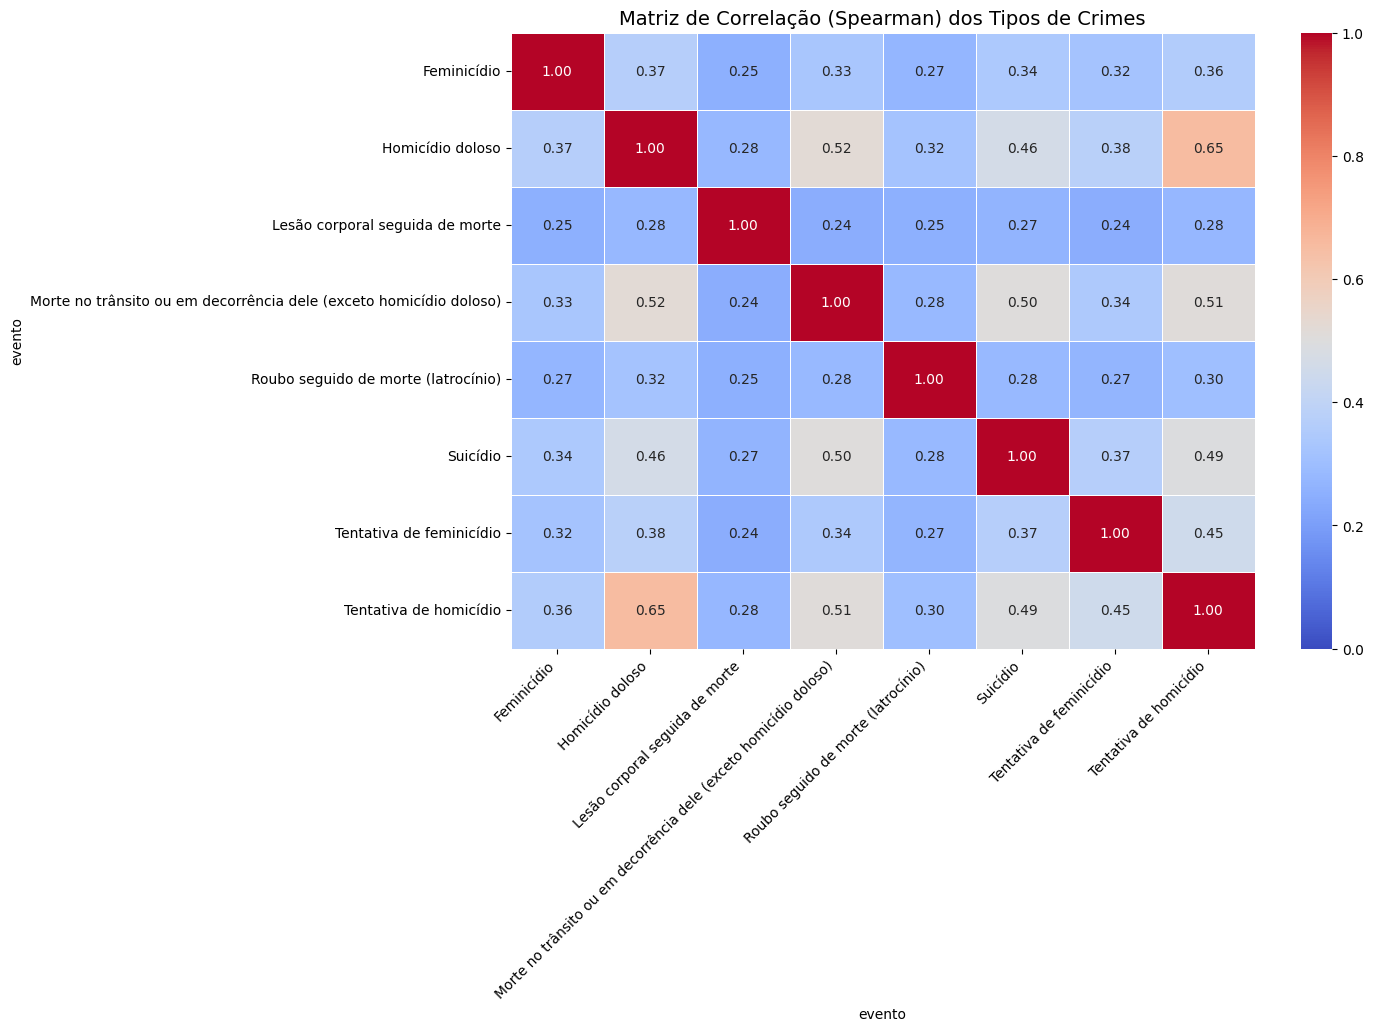

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
corr_matrix = df_final[colunas_crimes].corr(method='spearman')

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title('Matriz de Correlação (Spearman) dos Tipos de Crimes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

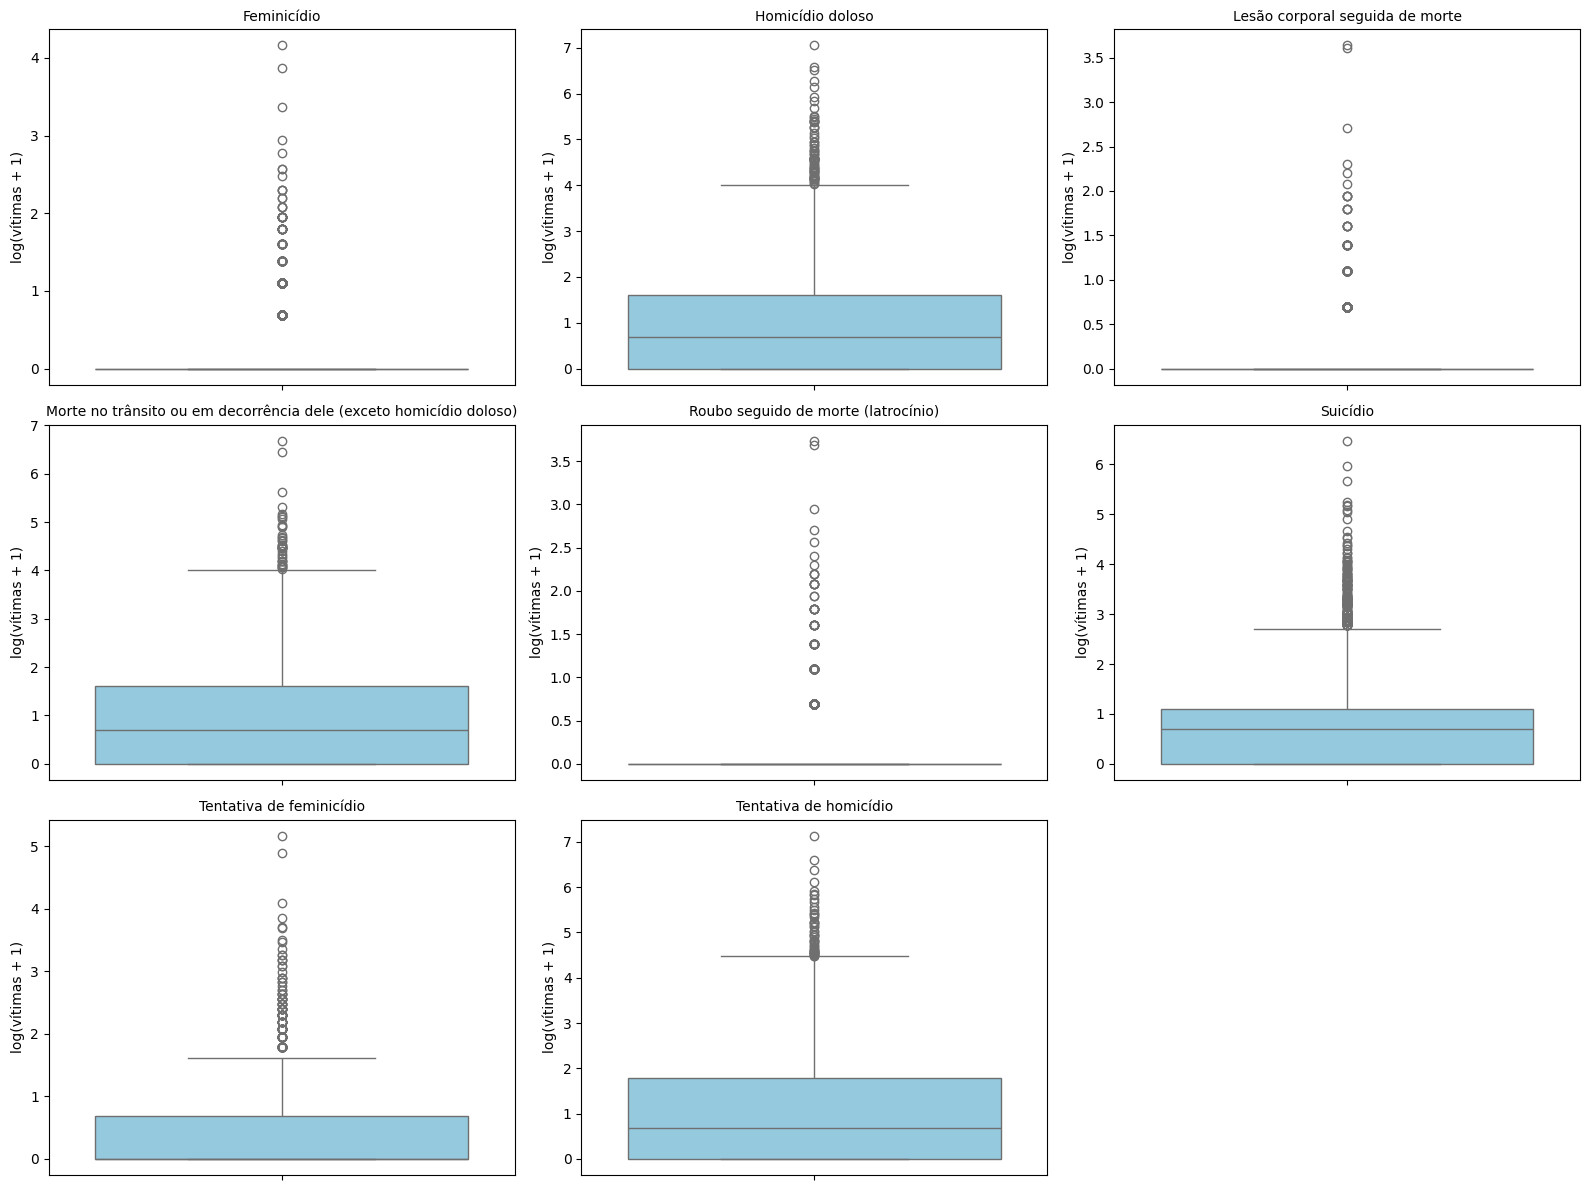

In [211]:
import numpy as np

df_log = df_final[colunas_crimes].apply(np.log1p)

plt.figure(figsize=(16, 12))
for i, crime in enumerate(colunas_crimes, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_log[crime], color='skyblue')
    plt.title(crime, fontsize=10)
    plt.ylabel('log(vítimas + 1)')
plt.tight_layout()
plt.show()

Embora o gráfico pareça assustador à primeira vista, esses pontos não são erros ou anomalias matemáticas, mas sim o reflexo da demografia brasileira.O Brasil tem mais de 5.500 municípios. A esmagadora maioria deles é composta por cidades de pequeno porte, onde a ocorrência de crimes graves é nula ou muito baixa durante o ano inteiro. Por outro lado, temos um número pequeno de metrópoles gigantescas (como São Paulo e Rio de Janeiro, que você mesmo identificou antes) que concentram milhares de ocorrências. Isso gera uma distribuição extremamente assimétrica (muitos zeros, poucos números gigantes). Então essa disperssão de dados é aceitável dado a natureza da análise.

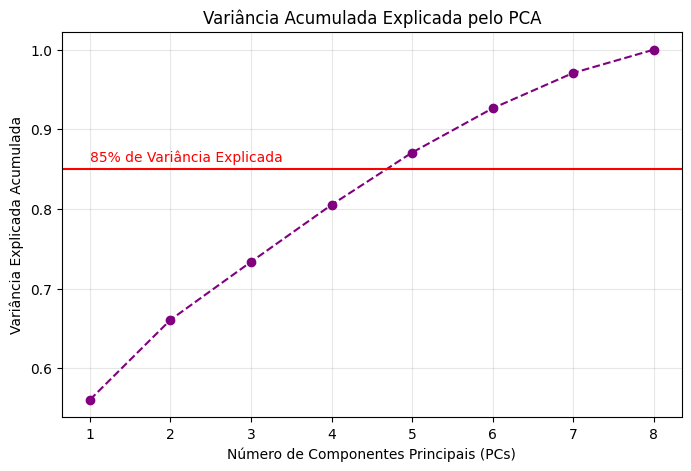

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--', color='purple')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(1, 0.86, '85% de Variância Explicada', color='red')

plt.title('Variância Acumulada Explicada pelo PCA')
plt.xlabel('Número de Componentes Principais (PCs)')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True, alpha=0.3)
plt.show()

Observando a curva, notamos que o primeiro componente sintético (PC1) sozinho explica cerca de 56% de toda a variância, o que na prática costuma representar o "tamanho" ou o "volume geral" da criminalidade do município. No entanto, para cruzarmos a nossa linha de corte de 85% de representatividade (a linha vermelha), precisamos utilizar 5 Componentes Principais. Isso significa que podemos reduzir as nossas 8 colunas originais de crimes para 5 colunas sintéticas perdendo apenas cerca de 15% da informação. O fato de precisarmos de 5 componentes (e não apenas 1 ou 2) é um ótimo insight: isso indica que a criminalidade no Brasil é multifacetada. Ou seja, os diferentes tipos de crimes não crescem todos exatamente na mesma proporção em todas as cidades, possuindo dinâmicas geográficas ou perfis de ocorrência próprios.

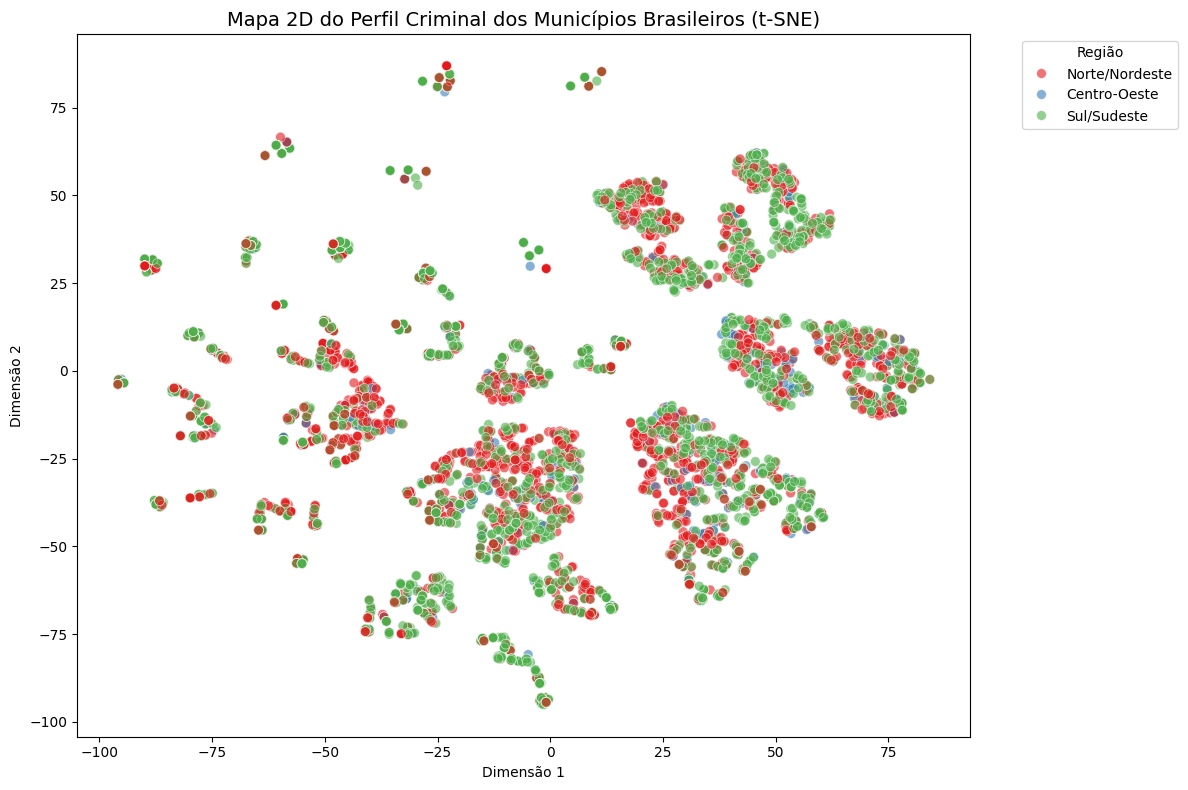

In [213]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame({
    'Dimensão 1': X_tsne[:, 0], 
    'Dimensão 2': X_tsne[:, 1], 
    'Região': df_final['Regiao'],
    'Município': df_final['municipio']
})

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='Dimensão 1', y='Dimensão 2', hue='Região', 
                palette='Set1', alpha=0.6, s=50)

plt.title('Mapa 2D do Perfil Criminal dos Municípios Brasileiros (t-SNE)', fontsize=14)
plt.legend(title='Região', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Esse gráfico nos traz as informações mais valiosas desses dados. Note que os pontos não estão espalhados de forma aleatória como uma nuvem única, eles formam "ilhas" ou grupos bem separados. Isso indica que existem tipologias ou perfis muito claros de municípios no Brasi.
Outro ponto importante é a relação entre as cores. Quase todos os grupos contêm bolinhas vermelhas e verdes juntas. Se a criminalidade fosse estritamente ditada pela região, veríamos um grande bloco verde de um lado e um grande bloco vermelho do outro.

# Análise de Dados

## Perfil de crimanilidade das cidades

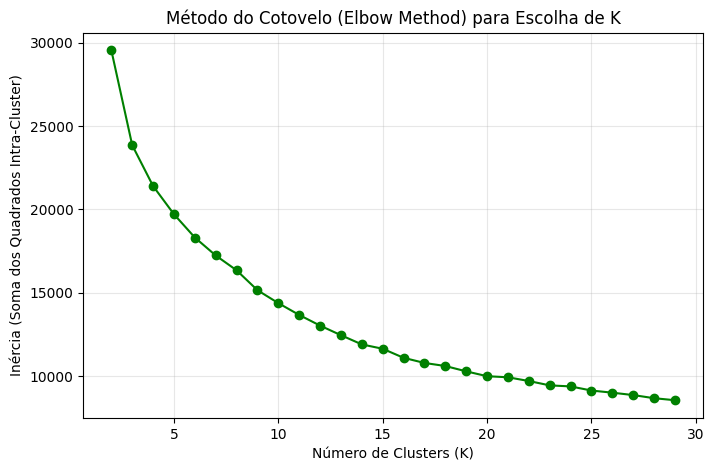

In [214]:
from sklearn.cluster import KMeans

inercia = []
K_range = range(2, 30)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inercia.append(kmeans.inertia_)

# Plota o gráfico do Cotovelo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inercia, marker='o', color='green')
plt.title('Método do Cotovelo (Elbow Method) para Escolha de K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Soma dos Quadrados Intra-Cluster)')
plt.grid(True, alpha=0.3)
plt.show()

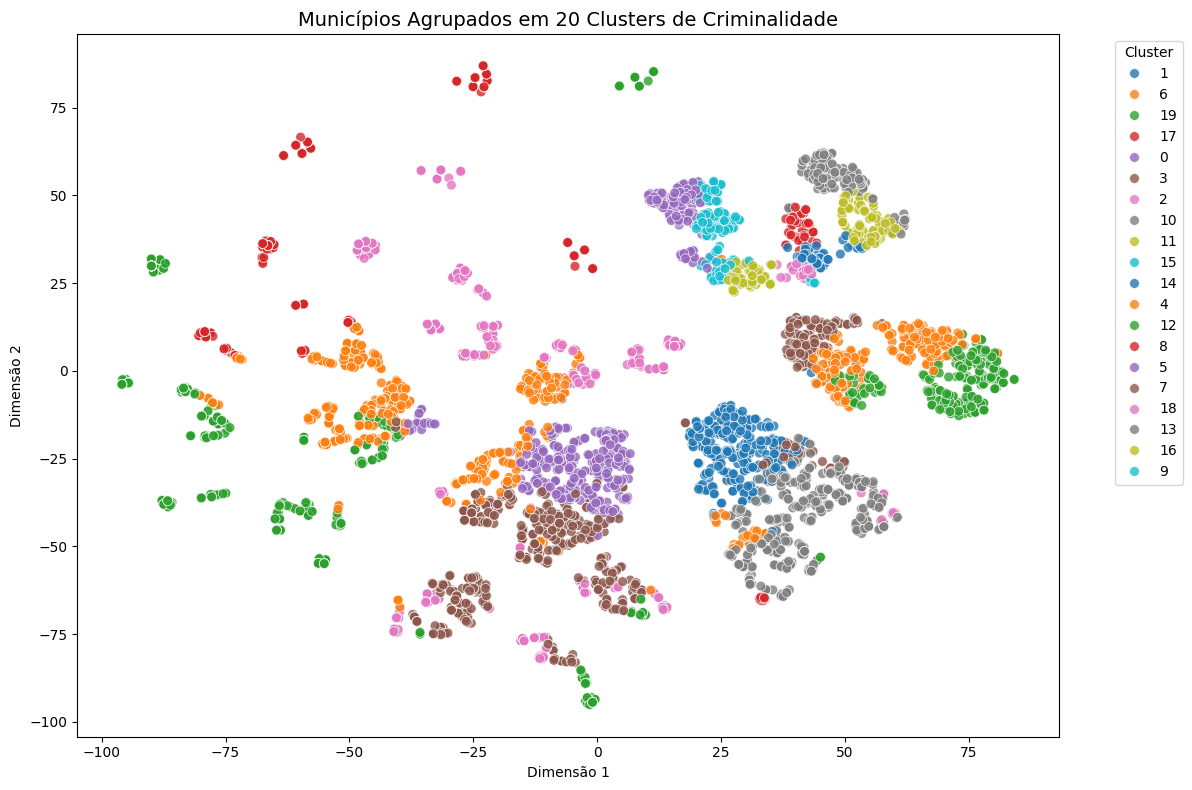

evento,Qtd_Municípios,Feminicídio,Homicídio doloso,Lesão corporal seguida de morte,Morte no trânsito ou em decorrência dele (exceto homicídio doloso),Roubo seguido de morte (latrocínio),Suicídio,Tentativa de feminicídio,Tentativa de homicídio
Cluster,,,,,,,,,
0,308,0.00,8.25,0.00,7.49,0.00,3.48,0.00,7.54
1,290,0.00,7.73,0.00,7.18,0.00,3.93,1.92,9.94
2,719,0.00,0.46,0.00,0.35,0.00,1.58,0.02,0.56
3,117,1.68,20.00,0.00,14.94,0.00,11.34,3.50,24.26
4,534,0.00,3.58,0.00,1.12,0.00,0.52,0.06,4.23
5,123,0.18,2.77,0.00,2.36,1.09,1.37,0.28,2.53
6,237,1.17,6.76,0.00,6.16,0.00,2.99,0.60,6.86
7,505,0.00,1.39,0.00,3.93,0.00,2.41,0.06,1.79
8,805,0.00,0.36,0.00,0.00,0.00,0.00,0.02,0.41


In [215]:
K_ESCOLHIDO = 20
# 15 seria um ótimo candidato, mas vamos usar 20 para ter mais detalhes na análise

kmeans = KMeans(n_clusters=K_ESCOLHIDO, random_state=42, n_init=10)

df_final['Cluster'] = kmeans.fit_predict(X_scaled)
df_tsne['Cluster'] = df_final['Cluster'].astype(str)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_tsne, x='Dimensão 1', y='Dimensão 2', hue='Cluster', 
                palette='tab10', alpha=0.8, s=50)
plt.title(f'Municípios Agrupados em {K_ESCOLHIDO} Clusters de Criminalidade', fontsize=14)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Descobrindo o Perfil de Cada Ilha (Profiling)
perfil_clusters = df_final.groupby('Cluster')[colunas_crimes].mean().round(2)

# Quantos municípios caíram em cada grupo?
perfil_clusters['Qtd_Municípios'] = df_final['Cluster'].value_counts()

# Reorganizando para a Qtd_Municípios ser a primeira coluna
cols = ['Qtd_Municípios'] + [c for c in perfil_clusters.columns if c != 'Qtd_Municípios']
perfil_clusters = perfil_clusters[cols]

# Exibindo a tabela com mapa de calor (as cores mais fortes indicam os maiores problemas do cluster)
display(perfil_clusters)

In [216]:
# Análise de cluster específico
CLUSTER_DESEJADO = 9

# Filtra o dataset para trazer apenas os municípios desse cluster
municipios_cluster = df_final[df_final['Cluster'] == CLUSTER_DESEJADO]

# Mostra a quantidade de municípios nesse grupo
print(f"O Cluster {CLUSTER_DESEJADO} possui {len(municipios_cluster)} municípios.")

# Exibe apenas as colunas de Estado, Município e os crimes, ordenando por algum crime 
display(municipios_cluster[['uf', 'municipio', 'Homicídio doloso', 'Roubo seguido de morte (latrocínio)']]
        .sort_values(by='Homicídio doloso', ascending=False)
        .head(20))

O Cluster 9 possui 9 municípios.


evento,uf,municipio,Homicídio doloso,Roubo seguido de morte (latrocínio)
3660,RJ,RIO DE JANEIRO,1152.0,41.0
677,CE,FORTALEZA,719.0,9.0
535,BA,SALVADOR,672.0,14.0
2915,PE,RECIFE,535.0,8.0
5358,SP,SÃO PAULO,467.0,39.0
161,AM,MANAUS,371.0,10.0
803,DF,BRASÍLIA,221.0,12.0
3285,PR,CURITIBA,160.0,7.0
2436,PA,BELÉM,152.0,8.0


### Teste de estabilidade

In [217]:
from sklearn.metrics import adjusted_rand_score

kmeans1 = KMeans(n_clusters=K_ESCOLHIDO, random_state=0, n_init=10)
kmeans2 = KMeans(n_clusters=K_ESCOLHIDO, random_state=1, n_init=10)
kmeans3 = KMeans(n_clusters=K_ESCOLHIDO, random_state=2, n_init=10)
kmeans4 = KMeans(n_clusters=K_ESCOLHIDO, random_state=100, n_init=10)


df_final['Cluster1'] = kmeans1.fit_predict(X_scaled)
df_final['Cluster2'] = kmeans2.fit_predict(X_scaled)
df_final['Cluster3'] = kmeans3.fit_predict(X_scaled)
df_final['Cluster4'] = kmeans4.fit_predict(X_scaled)

ari_0_1 = adjusted_rand_score(df_final['Cluster'], df_final['Cluster1'])
ari_0_2 = adjusted_rand_score(df_final['Cluster'], df_final['Cluster2'])
ari_0_3 = adjusted_rand_score(df_final['Cluster'], df_final['Cluster3'])
ari_0_4 = adjusted_rand_score(df_final['Cluster'], df_final['Cluster4'])

print("\n--- Scores de Consistência (Adjusted Rand Index) ---")
print(f"Execução 1 vs 2: {ari_0_1:.4f}")
print(f"Execução 1 vs 2: {ari_0_2:.4f}")
print(f"Execução 1 vs 3: {ari_0_3:.4f}")
print(f"Execução 1 vs 4: {ari_0_4:.4f}")
print("Nota: Valores muito próximos a 1.0 indicam altíssima consistência na separação dos grupos.")


--- Scores de Consistência (Adjusted Rand Index) ---
Execução 1 vs 2: 0.6948
Execução 1 vs 2: 0.7202
Execução 1 vs 3: 0.7783
Execução 1 vs 4: 0.9851
Nota: Valores muito próximos a 1.0 indicam altíssima consistência na separação dos grupos.


In [218]:
# Após a análise de consistência, podemos remover as colunas de clusters adicionais
df_final.drop(columns=['Cluster','Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], inplace=True)

## Combinações de crimes mais frequentes em municípios do Norte/Nordeste vs. Sul/Sudeste


In [219]:
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
mapeamento_crimes = {
    'Lesão corporal seguida de morte': 'Lesão Corp. c/ Morte',
    'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)': 'Morte no Trânsito',
    'Roubo seguido de morte (latrocínio)': 'Latrocínio',
    'Tentativa de feminicídio': 'Tent. Feminicídio',
    'Tentativa de homicídio': 'Tent. Homicídio',
    'Homicídio doloso': 'Homicídio Doloso'
}

df_otimizado = df_final.rename(columns=mapeamento_crimes)

colunas_crimes_curtas = [mapeamento_crimes.get(c, c) for c in colunas_crimes]

df_binario = df_otimizado.copy()
for crime in colunas_crimes_curtas:
    df_binario[crime] = (df_binario[crime] > 0).astype(bool)


df_n_ne = df_binario[df_binario['Regiao'] == 'Norte/Nordeste']
df_s_se = df_binario[df_binario['Regiao'] == 'Sul/Sudeste']

freq_n_ne = apriori(df_n_ne[colunas_crimes_curtas], min_support=0.15, use_colnames=True)
freq_s_se = apriori(df_s_se[colunas_crimes_curtas], min_support=0.15, use_colnames=True)

freq_n_ne['tamanho'] = freq_n_ne['itemsets'].apply(lambda x: len(x))
freq_s_se['tamanho'] = freq_s_se['itemsets'].apply(lambda x: len(x))

comb_n_ne = freq_n_ne[freq_n_ne['tamanho'] >= 2].sort_values(by='support', ascending=False).head(10)
comb_s_se = freq_s_se[freq_s_se['tamanho'] >= 2].sort_values(by='support', ascending=False).head(10)

comb_n_ne['itemsets_str'] = comb_n_ne['itemsets'].apply(lambda x: ' +\n'.join(list(x)))
comb_s_se['itemsets_str'] = comb_s_se['itemsets'].apply(lambda x: ' +\n'.join(list(x)))

C:\Users\cooto\AppData\Local\Temp\ipykernel_41396\2894088414.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=comb_n_ne, ax=axes[0], palette='Reds_r')
C:\Users\cooto\AppData\Local\Temp\ipykernel_41396\2894088414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=comb_s_se, ax=axes[1], palette='Blues_r')


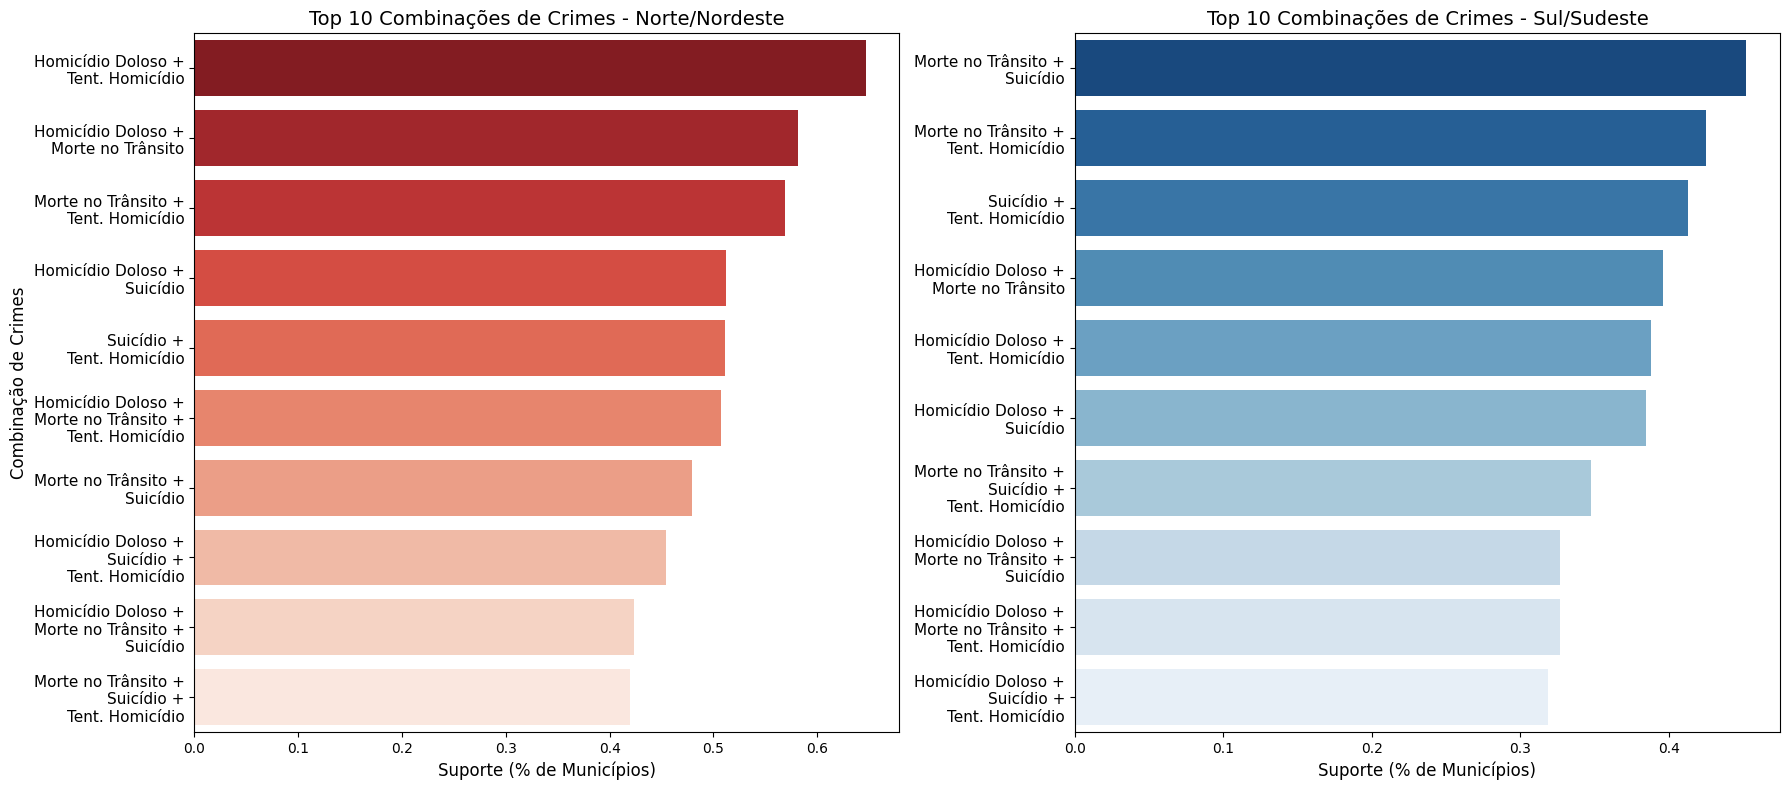

In [221]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico Norte/Nordeste
sns.barplot(x='support', y='itemsets_str', data=comb_n_ne, ax=axes[0], palette='Reds_r')
axes[0].set_title('Top 10 Combinações de Crimes - Norte/Nordeste', fontsize=14)
axes[0].set_xlabel('Suporte (% de Municípios)', fontsize=12)
axes[0].set_ylabel('Combinação de Crimes', fontsize=12)
axes[0].tick_params(axis='y', labelsize=11)

# Gráfico Sul/Sudeste
sns.barplot(x='support', y='itemsets_str', data=comb_s_se, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top 10 Combinações de Crimes - Sul/Sudeste', fontsize=14)
axes[1].set_xlabel('Suporte (% de Municípios)', fontsize=12)
axes[1].set_ylabel('')
axes[1].tick_params(axis='y', labelsize=11)

plt.tight_layout()
plt.show()

## Municípios com alto IDH têm perfil criminal diferente daqueles com baixo IDH

In [222]:
# =============================================================
# CÉLULA 2 — Limpeza da Base de Municípios (mundo_onu_adh_municipio.csv)
# =============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeamento código UF → sigla
mapa_uf = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA',
    '16': 'AP', '17': 'TO', '21': 'MA', '22': 'PI', '23': 'CE',
    '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL', '28': 'SE',
    '29': 'BA', '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS', '50': 'MS', '51': 'MT',
    '52': 'GO', '53': 'DF'
}

# Carregar CSV e filtrar para 2010 (ano mais recente do Censo)
df_mun_raw = pd.read_csv('./mundo_onu_adh_municipio.csv', sep=None, engine='python')

df_mun = (
    df_mun_raw[df_mun_raw['ano'] == 2010]
    [['id_municipio', 'idhm', 'idhm_e', 'idhm_l', 'idhm_r',
      'renda_pc', 'indice_gini', 'populacao', 'expectativa_vida',
      'taxa_analfabetismo_15_mais']]
    .copy()
    .dropna(subset=['idhm'])
    .reset_index(drop=True)
)

# Extrair UF a partir dos 2 primeiros dígitos do código IBGE
df_mun['uf'] = df_mun['id_municipio'].astype(str).str[:2].map(mapa_uf)

print(f"Municípios após limpeza: {df_mun.shape[0]}")
print(f"UFs presentes: {sorted(df_mun['uf'].unique())}")
print(f"IDHM — média: {df_mun['idhm'].mean():.3f} | mediana: {df_mun['idhm'].median():.3f}")
print(f"Faixa: {df_mun['idhm'].min():.3f} – {df_mun['idhm'].max():.3f}")
df_mun.head()

Municípios após limpeza: 5565
UFs presentes: ['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']
IDHM — média: 0.659 | mediana: 0.665
Faixa: 0.418 – 0.862


,id_municipio,idhm,idhm_e,idhm_l,idhm_r,renda_pc,indice_gini,populacao,expectativa_vida,taxa_analfabetismo_15_mais,uf
0,1100015,0.641,0.526,0.763,0.657,476.99,0.58,24392,70.75,11.99,RO
1,1100023,0.702,0.600,0.806,0.716,689.95,0.53,90353,73.36,7.90,RO
2,1100031,0.650,0.559,0.757,0.650,457.17,0.51,6313,70.39,13.63,RO
3,1100049,0.718,0.620,0.821,0.727,738.06,0.57,78574,74.27,8.29,RO
4,1100056,0.692,0.602,0.799,0.688,577.18,0.50,17029,72.94,10.29,RO


In [223]:
# =============================================================
# CÉLULA 3 — Limpeza da Base de Estados (data__1_.xlsx)
# =============================================================

mapa_estado_uf = {
    'Acre': 'AC', 'Alagoas': 'AL', 'Amapá': 'AP', 'Amazonas': 'AM',
    'Bahia': 'BA', 'Ceará': 'CE', 'Distrito Federal': 'DF', 'Espírito Santo': 'ES',
    'Goiás': 'GO', 'Maranhão': 'MA', 'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT',
    'Minas Gerais': 'MG', 'Paraíba': 'PB', 'Paraná': 'PR', 'Pará': 'PA',
    'Pernambuco': 'PE', 'Piauí': 'PI', 'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN', 'Rio Grande do Sul': 'RS', 'Rondônia': 'RO',
    'Roraima': 'RR', 'Santa Catarina': 'SC', 'São Paulo': 'SP',
    'Sergipe': 'SE', 'Tocantins': 'TO'
}

df_estados_raw = pd.read_excel('./EstadosIDH.xlsx')
df_estados = (
    df_estados_raw
    .dropna(subset=['IDHM 2021'])
    .query("Territorialidades != 'Brasil'")
    .loc[lambda d: ~d['Territorialidades'].str.contains('Elaboração|Fontes', na=False)]
    .copy()
)
df_estados.columns = ['estado', 'idhm_2021']
df_estados['idhm_2021'] = pd.to_numeric(df_estados['idhm_2021'], errors='coerce')
df_estados = df_estados.dropna().reset_index(drop=True)
df_estados['uf'] = df_estados['estado'].map(mapa_estado_uf)

print(f"Estados após limpeza: {df_estados.shape[0]}")
df_estados.sort_values('idhm_2021', ascending=False)

Estados após limpeza: 27


,estado,idhm_2021,uf
6,Distrito Federal,0.814,DF
24,São Paulo,0.806,SP
23,Santa Catarina,0.792,SC
12,Minas Gerais,0.774,MG
20,Rio Grande do Sul,0.771,RS
7,Espírito Santo,0.771,ES
14,Paraná,0.769,PR
18,Rio de Janeiro,0.762,RJ
10,Mato Grosso do Sul,0.742,MS
8,Goiás,0.737,GO


In [224]:
# =============================================================
# CÉLULA 4 — Preparação dos crimes
# =============================================================

# Nomes curtos dos crimes (mesmo mapeamento da análise regional)
mapeamento_crimes = {
    'Lesão corporal seguida de morte': 'Lesão Corp. c/ Morte',
    'Morte no trânsito ou em decorrência dele (exceto homicídio doloso)': 'Morte no Trânsito',
    'Roubo seguido de morte (Latrocínio)': 'Latrocínio',
    'Tentativa de feminicídio': 'Tent. Feminicídio',
    'Tentativa de homicídio': 'Tent. Homicídio',
    'Homicídio doloso': 'Homicídio Doloso',
}
df_final_plot = df_final.rename(columns=mapeamento_crimes)
colunas_crimes = [c for c in df_final_plot.columns if c not in ['uf', 'municipio']]

# Agregar por UF para análise estadual
df_crimes_uf = df_final_plot.groupby('uf')[colunas_crimes].sum().reset_index()



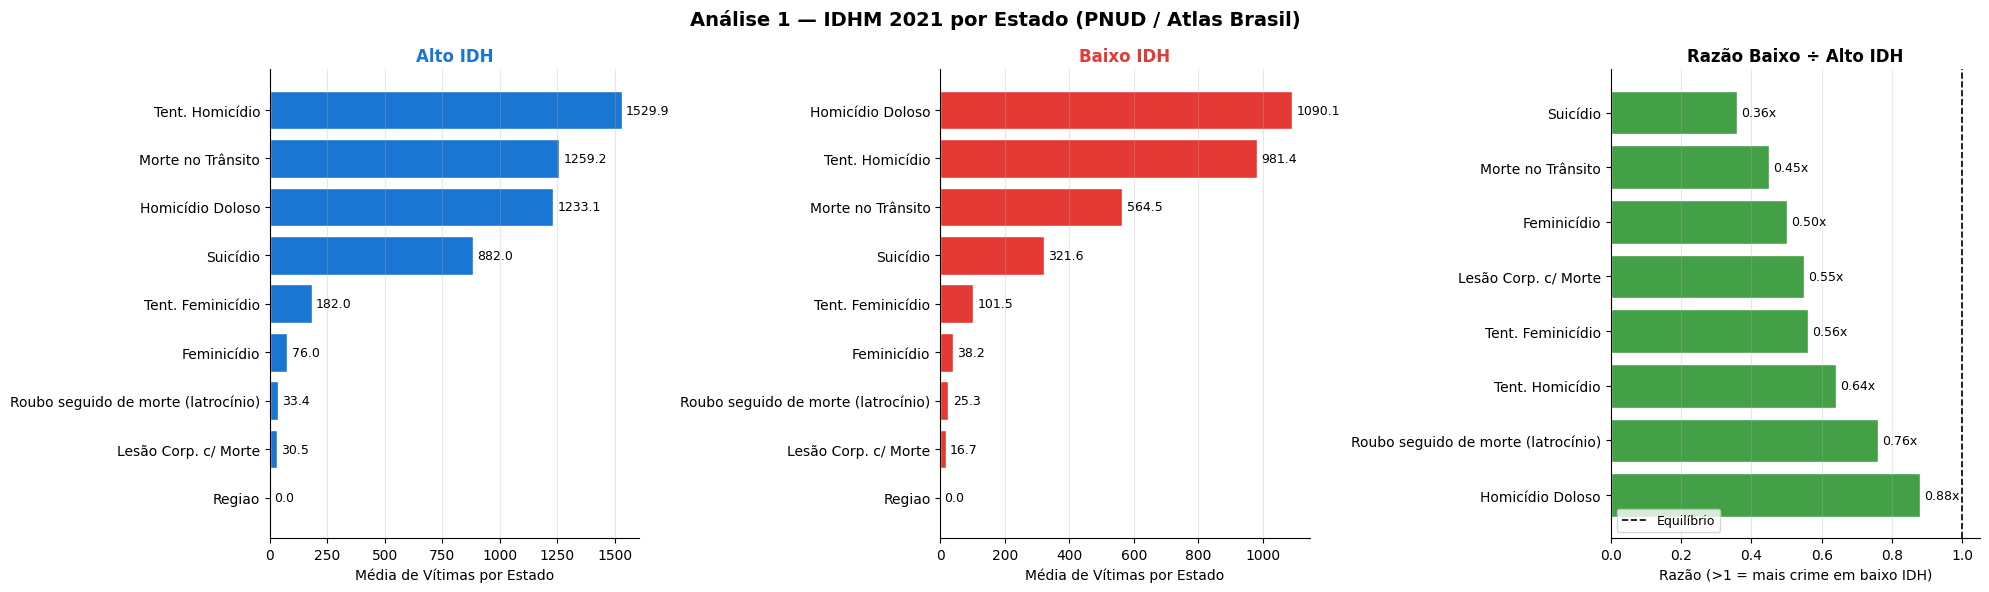

                              Crime    Alto IDH   Baixo IDH  Razão (Baixo/Alto)
                   Homicídio Doloso 1233.142857 1090.076923                0.88
Roubo seguido de morte (latrocínio)   33.357143   25.307692                0.76
                    Tent. Homicídio 1529.928571  981.384615                0.64
                  Tent. Feminicídio  182.000000  101.461538                0.56
               Lesão Corp. c/ Morte   30.500000   16.692308                0.55
                        Feminicídio   76.000000   38.153846                0.50
                  Morte no Trânsito 1259.214286  564.538462                0.45
                           Suicídio  882.000000  321.615385                0.36
                             Regiao    0.000000    0.000000                 NaN


In [225]:
# =============================================================
# CÉLULA 5 — Análise 1: por UF × IDHM 2021 (data__1_.xlsx)
# =============================================================

df_a1 = df_crimes_uf.merge(df_estados[['uf', 'idhm_2021']], on='uf', how='inner')
mediana_1 = df_a1['idhm_2021'].median()
df_a1['grupo'] = df_a1['idhm_2021'].apply(
    lambda x: f'Alto IDH (≥{mediana_1:.3f})' if x >= mediana_1 else f'Baixo IDH (<{mediana_1:.3f})'
)
# 1. Garante que as colunas de crimes sejam numéricas (converte erros em NaN)
for col in colunas_crimes:
    df_a1[col] = pd.to_numeric(df_a1[col].astype(str).str.replace(',', '.'), errors='coerce')

# 2. Preenche possíveis valores vazios com 0 (opcional, mas evita erros no cálculo)
df_a1[colunas_crimes] = df_a1[colunas_crimes].fillna(0)
# Média de vítimas por crime e grupo
df_med1 = df_a1.groupby('grupo')[colunas_crimes].mean().T.reset_index()
df_med1.columns = ['Crime', 'Alto IDH', 'Baixo IDH']
df_med1['Razão (Baixo/Alto)'] = (df_med1['Baixo IDH'] / df_med1['Alto IDH'].replace(0, np.nan)).round(2)
df_med1 = df_med1.sort_values('Razão (Baixo/Alto)', ascending=False)

# ── Gráfico de barras comparativo
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Análise 1 — IDHM 2021 por Estado (PNUD / Atlas Brasil)', fontsize=14, fontweight='bold')

cores = {'Alto IDH': '#1976D2', 'Baixo IDH': '#E53935'}

for ax, grupo in zip(axes[:2], ['Alto IDH', 'Baixo IDH']):
    df_plot = df_med1.sort_values(grupo, ascending=True)
    bars = ax.barh(df_plot['Crime'], df_plot[grupo], color=cores[grupo], edgecolor='white')
    ax.set_title(grupo, fontsize=12, fontweight='bold', color=cores[grupo])
    ax.set_xlabel('Média de Vítimas por Estado')
    ax.bar_label(bars, fmt='%.1f', padding=3, fontsize=9)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='x', alpha=0.3)

# Razão
ax = axes[2]
cores_razao = ['#E53935' if r > 1 else '#43A047' for r in df_med1['Razão (Baixo/Alto)']]
bars = ax.barh(df_med1['Crime'], df_med1['Razão (Baixo/Alto)'], color=cores_razao, edgecolor='white')
ax.axvline(1, color='black', linestyle='--', linewidth=1.2, label='Equilíbrio')
ax.set_title('Razão Baixo ÷ Alto IDH', fontsize=12, fontweight='bold')
ax.set_xlabel('Razão (>1 = mais crime em baixo IDH)')
ax.bar_label(bars, fmt='%.2fx', padding=3, fontsize=9)
ax.legend(fontsize=9)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()
print(df_med1[['Crime', 'Alto IDH', 'Baixo IDH', 'Razão (Baixo/Alto)']].to_string(index=False))


Municípios cruzados: 5281 de 5289 (99.8%)

Mediana IDHM municipal: 0.665
grupo
Alto IDH (≥0.665)     2801
Baixo IDH (<0.665)    2761
Name: municípios, dtype: int64


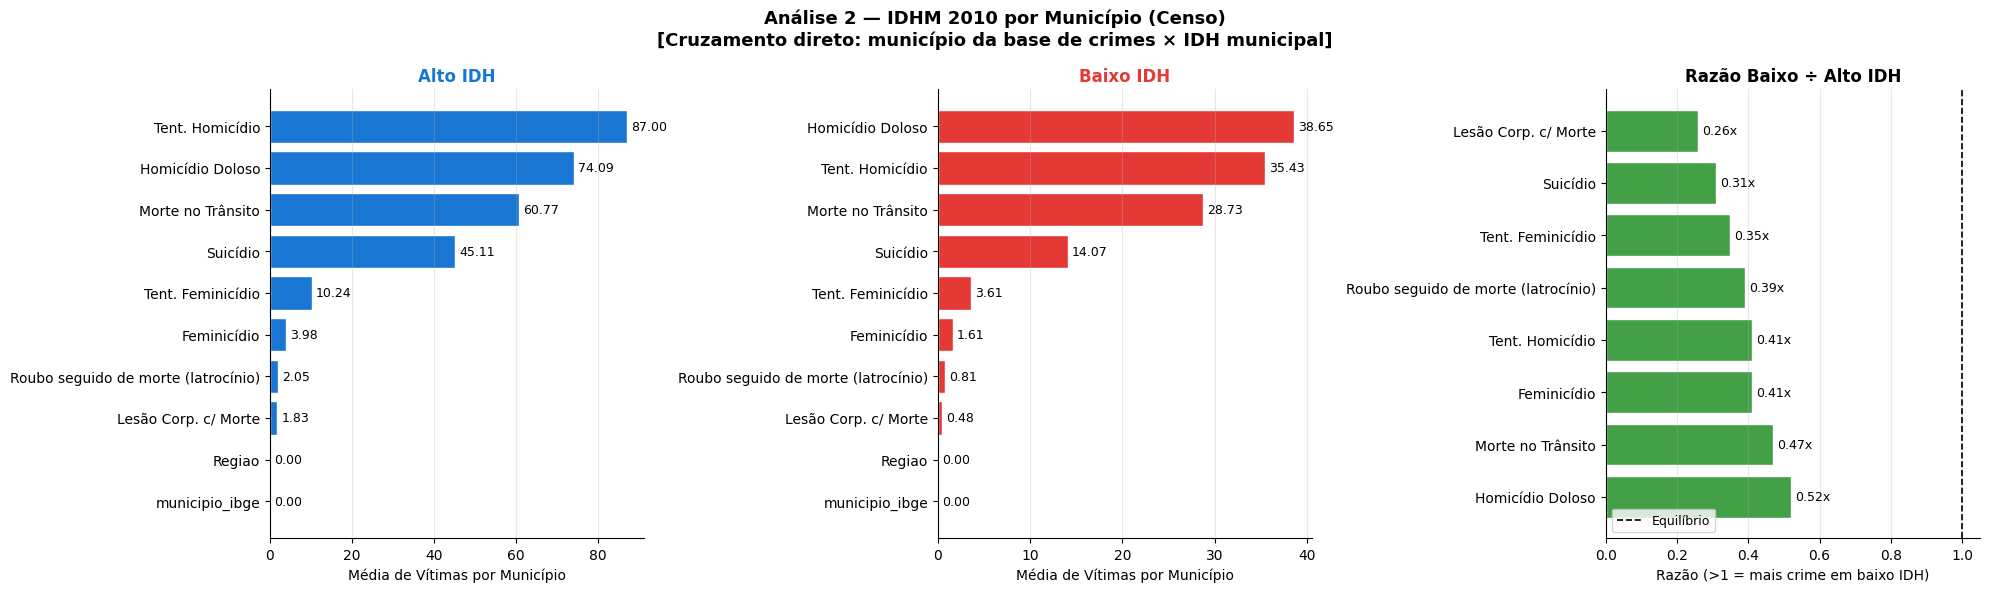


Tabela completa:
                              Crime  Alto IDH  Baixo IDH  Razão (Baixo/Alto)
                   Homicídio Doloso 74.094966  38.645418                0.52
                  Morte no Trânsito 60.774723  28.725100                0.47
                        Feminicídio  3.977151   1.611735                0.41
                    Tent. Homicídio 87.001071  35.432814                0.41
Roubo seguido de morte (latrocínio)  2.045698   0.807678                0.39
                  Tent. Feminicídio 10.235630   3.614632                0.35
                           Suicídio 45.112460  14.070989                0.31
               Lesão Corp. c/ Morte  1.827919   0.478088                0.26
                             Regiao  0.000000   0.000000                 NaN
                     municipio_ibge  0.000000   0.000000                 NaN


In [226]:
# =============================================================
# CÉLULA 6 — Análise com IDHM 2010 (base de municípios)
#             com cruzamento direto por município via tabela IBGE
# =============================================================

import unicodedata

# --- Passo 1: Carregar tabela de nomes do IBGE ---
df_inicio = pd.read_excel('./municipios_ibge.xls', skiprows=6)
df_nomes = df_inicio[['Nome_Município', 'Nome_UF', 'Código Município Completo']].copy()
df_nomes.columns = ['municipio_ibge', 'nome_uf', 'id_municipio']
df_nomes['id_municipio'] = pd.to_numeric(df_nomes['id_municipio'], errors='coerce')
df_nomes = df_nomes.dropna(subset=['id_municipio']).reset_index(drop=True)
df_nomes['id_municipio'] = df_nomes['id_municipio'].astype(int)

# Mapear nome do estado → sigla UF
mapa_uf = {
    'Rondônia': 'RO', 'Acre': 'AC', 'Amazonas': 'AM', 'Roraima': 'RR',
    'Pará': 'PA', 'Amapá': 'AP', 'Tocantins': 'TO', 'Maranhão': 'MA',
    'Piauí': 'PI', 'Ceará': 'CE', 'Rio Grande do Norte': 'RN',
    'Paraíba': 'PB', 'Pernambuco': 'PE', 'Alagoas': 'AL', 'Sergipe': 'SE',
    'Bahia': 'BA', 'Minas Gerais': 'MG', 'Espírito Santo': 'ES',
    'Rio de Janeiro': 'RJ', 'São Paulo': 'SP', 'Paraná': 'PR',
    'Santa Catarina': 'SC', 'Rio Grande do Sul': 'RS',
    'Mato Grosso do Sul': 'MS', 'Mato Grosso': 'MT', 'Goiás': 'GO',
    'Distrito Federal': 'DF'
}
df_nomes['uf'] = df_nomes['nome_uf'].map(mapa_uf)

# --- Passo 2: Função de normalização para o merge ---
def normalizar(texto):
    if pd.isna(texto):
        return ''
    texto = str(texto).upper().strip()
    texto = unicodedata.normalize('NFD', texto)
    texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')
    return texto

df_nomes['municipio_norm'] = df_nomes['municipio_ibge'].apply(normalizar)
df_nomes['uf_norm'] = df_nomes['uf'].str.strip().str.upper()

# --- Passo 3: Juntar tabela IBGE com o CSV de IDH municipal ---
# df_mun vem da Célula 2: tem 'id_municipio' e 'uf'
df_mun_nome = df_mun.merge(
    df_nomes[['id_municipio', 'municipio_ibge', 'municipio_norm', 'uf_norm']],
    on='id_municipio',
    how='left'
)

# --- Passo 4: Normalizar municípios na base de crimes ---
df_final_plot['municipio_norm'] = df_final_plot['municipio'].apply(normalizar)
df_final_plot['uf_norm'] = df_final_plot['uf'].str.strip().str.upper()

# --- Passo 5: Cruzar crimes × IDH diretamente por município ---
df_a2_mun = df_final_plot.merge(
    df_mun_nome[['municipio_norm', 'uf_norm', 'idhm', 'municipio_ibge']],
    on=['municipio_norm', 'uf_norm'],
    how='inner'
)

casados = df_a2_mun['municipio_norm'].nunique()
total   = df_final_plot['municipio_norm'].nunique()
print(f"\nMunicípios cruzados: {casados} de {total} ({casados/total*100:.1f}%)")

nao_casados = df_final_plot[
    ~df_final_plot['municipio_norm'].isin(df_a2_mun['municipio_norm'])
][['uf', 'municipio']].drop_duplicates()

# --- Passo 6: Classificar por IDH e calcular médias ---
mediana_mun = df_a2_mun['idhm'].median()
df_a2_mun['grupo'] = df_a2_mun['idhm'].apply(
    lambda x: f'Alto IDH (≥{mediana_mun:.3f})' if x >= mediana_mun 
              else f'Baixo IDH (<{mediana_mun:.3f})'
)

print(f"\nMediana IDHM municipal: {mediana_mun:.3f}")
print(df_a2_mun.groupby('grupo').size().rename('municípios'))

# Identifica as colunas de crimes
colunas_crimes = [c for c in df_a2_mun.columns 
                  if c not in ['uf', 'municipio', 'municipio_norm', 'uf_norm', 'idhm', 'grupo', 'id_municipio']]

# --- CORREÇÃO: Converte as colunas de crimes para numérico ---
for col in colunas_crimes:
    # Remove pontos de milhar, troca vírgula por ponto e converte
    df_a2_mun[col] = pd.to_numeric(
        df_a2_mun[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), 
        errors='coerce'
    ).fillna(0)
# -----------------------------------------------------------

# Agora o .mean() não dará mais erro
df_med2 = df_a2_mun.groupby('grupo')[colunas_crimes].mean().T.reset_index()
df_med2.columns = ['Crime', 'Alto IDH', 'Baixo IDH']
df_med2['Razão (Baixo/Alto)'] = (
    df_med2['Baixo IDH'] / df_med2['Alto IDH'].replace(0, np.nan)
).round(2)
df_med2 = df_med2.sort_values('Razão (Baixo/Alto)', ascending=False)

# --- Passo 7: Visualização ---
cores = {'Alto IDH': '#1976D2', 'Baixo IDH': '#E53935'}

fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle(
    'Análise 2 — IDHM 2010 por Município (Censo)\n'
    '[Cruzamento direto: município da base de crimes × IDH municipal]',
    fontsize=13, fontweight='bold'
)

for ax, grupo in zip(axes[:2], ['Alto IDH', 'Baixo IDH']):
    df_plot = df_med2.sort_values(grupo, ascending=True)
    bars = ax.barh(df_plot['Crime'], df_plot[grupo], color=cores[grupo], edgecolor='white')
    ax.set_title(grupo, fontsize=12, fontweight='bold', color=cores[grupo])
    ax.set_xlabel('Média de Vítimas por Município')
    ax.bar_label(bars, fmt='%.2f', padding=3, fontsize=9)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='x', alpha=0.3)

ax = axes[2]
cores_razao = ['#E53935' if r > 1 else '#43A047' for r in df_med2['Razão (Baixo/Alto)']]
bars = ax.barh(df_med2['Crime'], df_med2['Razão (Baixo/Alto)'],
               color=cores_razao, edgecolor='white')
ax.axvline(1, color='black', linestyle='--', linewidth=1.2, label='Equilíbrio')
ax.set_title('Razão Baixo ÷ Alto IDH', fontsize=12, fontweight='bold')
ax.set_xlabel('Razão (>1 = mais crime em baixo IDH)')
ax.bar_label(bars, fmt='%.2fx', padding=3, fontsize=9)
ax.legend(fontsize=9)
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nTabela completa:")
print(df_med2[['Crime', 'Alto IDH', 'Baixo IDH', 'Razão (Baixo/Alto)']].to_string(index=False))

## O crescimento econômico está associado a mudanças no tipo de criminalidade

In [ ]:
import requests
import pandas as pd
import unicodedata

# PIB dos Municípios (Variável 37 = PIB Total em Mil Reais para 2021)
url_pib = "https://servicodados.ibge.gov.br/api/v3/agregados/5938/periodos/2021/variaveis/37?localidades=N6[all]"
response_pib = requests.get(url_pib)
dados_pib = response_pib.json()[0]['resultados'][0]['series']

# Estimativas de População (Agregado 6579, Variável 9324 = População Residente para 2021)
url_pop = "https://servicodados.ibge.gov.br/api/v3/agregados/6579/periodos/2021/variaveis/9324?localidades=N6[all]"
response_pop = requests.get(url_pop)
dados_pop = response_pop.json()[0]['resultados'][0]['series']

municipios_dict = {}

for item in dados_pib:
    cod_ibge = item['localidade']['id']
    nome_completo = item['localidade']['nome']
    
    if ' - ' in nome_completo:
        cidade, uf = nome_completo.rsplit(' - ', 1)
    else:
        cidade, uf = nome_completo, ""
        
    try:
        pib_total = float(item['serie']['2021']) * 1000 
    except (ValueError, KeyError, TypeError):
        pib_total = 0
        
    municipios_dict[cod_ibge] = {
        'uf': uf,
        'municipio': cidade,
        'pib_total': pib_total,
        'populacao': 0  
    }

for item in dados_pop:
    cod_ibge = item['localidade']['id']
    try:
        populacao = int(item['serie']['2021'])
    except (ValueError, KeyError, TypeError):
        populacao = 0
        
    if cod_ibge in municipios_dict:
        municipios_dict[cod_ibge]['populacao'] = populacao

df_ibge = pd.DataFrame.from_dict(municipios_dict, orient='index').reset_index(drop=True)

df_ibge['pib_per_capita'] = df_ibge.apply(
    lambda row: (row['pib_total'] / row['populacao']) if row['populacao'] > 0 else 0, 
    axis=1
)

def padronizar_nome_cidade(nome):
    if pd.isna(nome): return str(nome)

    # Tratamento dos textos para tirar acentos e deixar tudo em maiúsculo
    nome_sem_acento = ''.join(c for c in unicodedata.normalize('NFD', str(nome)) if unicodedata.category(c) != 'Mn')
    return nome_sem_acento.strip().upper()

df_final['municipio_limpo'] = df_final['municipio'].apply(padronizar_nome_cidade)
df_ibge['municipio_limpo'] = df_ibge['municipio'].apply(padronizar_nome_cidade)

df_integrado = pd.merge(
    df_final, 
    df_ibge[['uf', 'municipio_limpo', 'populacao', 'pib_total', 'pib_per_capita']], 
    on=['uf', 'municipio_limpo'], 
    how='inner'
).drop(columns=['municipio_limpo'])

display(df_integrado[['uf', 'municipio', 'populacao', 'pib_total', 'pib_per_capita']].head(5))

### Verificação de correlação entre crimes e crescimento econômico

In [ ]:

colunas_base = ['uf', 'municipio', 'populacao', 'pib_total', 'pib_per_capita', 'Regiao']

colunas_crimes = [
    col for col in df_integrado.columns 
    if col not in colunas_base and pd.api.types.is_numeric_dtype(df_integrado[col])
]

colunas_base_presentes = [col for col in colunas_base if col in df_integrado.columns]

df_longo = df_integrado.melt(
    id_vars=colunas_base_presentes, 
    value_vars=colunas_crimes, 
    var_name='evento', 
    value_name='qtd_crimes'
)

df_longo['qtd_crimes'] = pd.to_numeric(df_longo['qtd_crimes'], errors='coerce').fillna(0)

crimes_mun = df_longo[df_longo['populacao'] > 0].copy()

crimes_mun['taxa_100k'] = (crimes_mun['qtd_crimes'] / crimes_mun['populacao']) * 100000

# Utilizar apenas casos em que sabemos o valor da populacao
df_corr = df_integrado[df_integrado['populacao'] > 0].copy()

# Calculando a taxa 100k para cada coluna de crime
for crime in colunas_crimes:
    df_corr[crime] = pd.to_numeric(df_corr[crime], errors='coerce').fillna(0)
    df_corr[crime] = (df_corr[crime] / df_corr['populacao']) * 100000

# Calculando a correlação de Spearman do PIB com as taxas dos crimes
correlacoes = df_corr[colunas_crimes + ['pib_per_capita']].corr(method='spearman')['pib_per_capita'].drop('pib_per_capita')

corr_df = correlacoes.reset_index().rename(columns={'index': 'Crime', 'pib_per_capita': 'Correlacao_com_PIB'}).sort_values(by='Correlacao_com_PIB', ascending=False)

print("Crimes que aumentam em cidades mais ricas:")
display(corr_df[corr_df['Correlacao_com_PIB'] > 0])

print("Crimes que diminuem em cidades mais ricas:")
display(corr_df[corr_df['Correlacao_com_PIB'] < 0])

### Grafico representativo das correlações entre crescimento econômico e crimes

In [ ]:
TAMANHO_MAXIMO = 30 

corr_df_sorted = corr_df.sort_values(by='Correlacao_com_PIB', ascending=False).copy()

corr_df_sorted['Crime_Curto'] = corr_df_sorted['Crime'].apply(
    lambda x: str(x)[:TAMANHO_MAXIMO] + '...' if len(str(x)) > TAMANHO_MAXIMO else str(x)
)

plt.figure(figsize=(12, 7))

cores = ["#219fbe" if val > 0 else "#ab2d2d" for val in corr_df_sorted['Correlacao_com_PIB']]

ax = sns.barplot(
    data=corr_df_sorted, 
    x='Crime_Curto', 
    y='Correlacao_com_PIB', 
    palette=cores
)

plt.axhline(0, color='black', linewidth=1.2)

plt.xticks(rotation=45, ha='right', fontsize=11)

plt.title('Associação entre Crescimento Econômico e Tipos de Crime', fontsize=16, pad=20)
plt.ylabel('Correlação com o PIB per capita\n( ↑ Sobe com a riqueza | ↓ Desce com a riqueza )', fontsize=12)
plt.xlabel('')

sns.despine(bottom=True)

plt.show()